# 1. Packages

In [1]:
import pandas as pd
import pyarrow
import fastparquet
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from joblib import Parallel, delayed
from sklearn.metrics import classification_report, accuracy_score, precision_score
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid, StratifiedKFold, RandomizedSearchCV

# 2. Data

In [3]:
os.chdir('/Users/clemenspaulsen/Desktop/May24_BDS_INT_Fire_Brigade/data')

df = pd.read_parquet('df_cleaned_for_classification_models.parquet')
df.head()

print(df.columns.tolist())

['IncidentGroup_Fire', 'IncidentGroup_Special Service', 'AggregatedPropertyCategory_Outdoor', 'AggregatedPropertyCategory_Residential', 'AggregatedPropertyCategory_Vehicle', 'CellEastingNorthing2500_502500-175000', 'CellEastingNorthing2500_502500-177500', 'CellEastingNorthing2500_502500-180000', 'CellEastingNorthing2500_502500-182500', 'CellEastingNorthing2500_502500-187500', 'CellEastingNorthing2500_502500-190000', 'CellEastingNorthing2500_502500-192500', 'CellEastingNorthing2500_505000-172500', 'CellEastingNorthing2500_505000-175000', 'CellEastingNorthing2500_505000-177500', 'CellEastingNorthing2500_505000-180000', 'CellEastingNorthing2500_505000-182500', 'CellEastingNorthing2500_505000-185000', 'CellEastingNorthing2500_505000-187500', 'CellEastingNorthing2500_505000-190000', 'CellEastingNorthing2500_507500-170000', 'CellEastingNorthing2500_507500-172500', 'CellEastingNorthing2500_507500-175000', 'CellEastingNorthing2500_507500-177500', 'CellEastingNorthing2500_507500-180000', 'CellE

In [5]:
percentage_counts = df['ResponseTimeBinary'].value_counts(normalize=True) * 100

# Print the percentages
print(percentage_counts)

ResponseTimeBinary
1    70.625231
0    29.374769
Name: proportion, dtype: float64


In [7]:
target = df['ResponseTimeBinary']

features = df.drop(columns=['ResponseTimeBinary'])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=666)

# 3. XGBoost Model

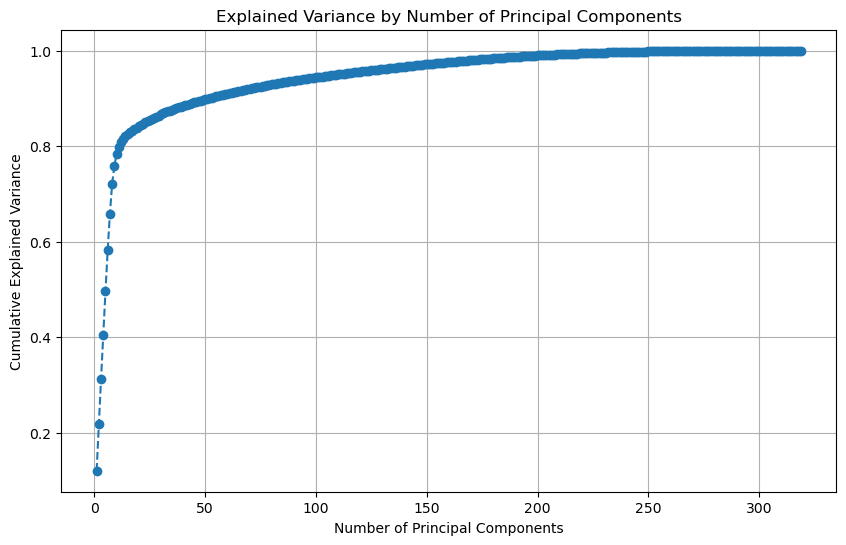

In [13]:
from sklearn.decomposition import PCA

# Step 1: Fit PCA to the training data
pca = PCA().fit(X_train)

# Step 2: Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Step 3: Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.grid()
plt.show()

In [31]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Simple XGBoost model
simple_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
simple_model.fit(X_train, y_train)

# Evaluate the model
y_train_pred = simple_model.predict(X_train)
y_train_pred_proba = simple_model.predict_proba(X_train)[:, 1]
y_test_pred = simple_model.predict(X_test)
y_test_pred_proba = simple_model.predict_proba(X_test)[:, 1]

train_accuracy = accuracy_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred_proba)

print("Simple Model")
print("Training Accuracy:", train_accuracy)
print("Training ROC-AUC Score:", train_roc_auc)
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))

print("Testing Accuracy:", test_accuracy)
print("Testing ROC-AUC Score:", test_roc_auc)
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred))


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:12:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Simple Model
Training Accuracy: 0.7630037645417721
Training ROC-AUC Score: 0.7566594504712376
Training Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.36      0.47    361454
           1       0.78      0.93      0.85    868709

    accuracy                           0.76   1230163
   macro avg       0.73      0.65      0.66   1230163
weighted avg       0.75      0.76      0.74   1230163

Testing Accuracy: 0.7606628059348185
Testing ROC-AUC Score: 0.7511869623148083
Testing Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.36      0.47     90243
           1       0.78      0.93      0.85    217298

    accuracy                           0.76    307541
   macro avg       0.73      0.64      0.66    307541
weighted avg       0.75      0.76      0.73    307541



In [33]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Apply PCA to retain 85% of the variance
pca = PCA(n_components=0.85)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Define the model and hyperparameters to tune
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
}

# Perform Randomized Search with cross-validation
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, 
                                   scoring='roc_auc', cv=StratifiedKFold(n_splits=3), 
                                   n_iter=10, verbose=1, n_jobs=-1, random_state=42)
random_search.fit(X_train_pca, y_train)

# Train the final model with the best hyperparameters
best_params = random_search.best_params_
pca_model = xgb.XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
pca_model.fit(X_train_pca, y_train)

# Evaluate the model
y_train_pred = pca_model.predict(X_train_pca)
y_train_pred_proba = pca_model.predict_proba(X_train_pca)[:, 1]
y_test_pred = pca_model.predict(X_test_pca)
y_test_pred_proba = pca_model.predict_proba(X_test_pca)[:, 1]

train_accuracy = accuracy_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred_proba)

print("PCA and Hyperparameter Tuning Model")
print("Training Accuracy:", train_accuracy)
print("Training ROC-AUC Score:", train_roc_auc)
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))

print("Testing Accuracy:", test_accuracy)
print("Testing ROC-AUC Score:", test_roc_auc)
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred))

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:15:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:15:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:15:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-package

PCA and Hyperparameter Tuning Model
Training Accuracy: 0.7526709875032821
Training ROC-AUC Score: 0.7453015339493826
Training Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.33      0.44    361454
           1       0.77      0.93      0.84    868709

    accuracy                           0.75   1230163
   macro avg       0.71      0.63      0.64   1230163
weighted avg       0.74      0.75      0.72   1230163

Testing Accuracy: 0.7523874865465092
Testing ROC-AUC Score: 0.7413189442802625
Testing Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.33      0.44     90243
           1       0.77      0.93      0.84    217298

    accuracy                           0.75    307541
   macro avg       0.71      0.63      0.64    307541
weighted avg       0.74      0.75      0.72    307541



In [35]:
import numpy as np
import pandas as pd
import xgboost as xgb
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Undersample the majority class in the training set
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = undersample.fit_resample(X_train, y_train)

# Simple XGBoost model
undersample_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
undersample_model.fit(X_train_resampled, y_train_resampled)

# Evaluate the model
y_train_pred = undersample_model.predict(X_train_resampled)
y_train_pred_proba = undersample_model.predict_proba(X_train_resampled)[:, 1]
y_test_pred = undersample_model.predict(X_test)
y_test_pred_proba = undersample_model.predict_proba(X_test)[:, 1]

train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
train_roc_auc = roc_auc_score(y_train_resampled, y_train_pred_proba)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred_proba)

print("Undersampling Model")
print("Training Accuracy:", train_accuracy)
print("Training ROC-AUC Score:", train_roc_auc)
print("Training Classification Report:")
print(classification_report(y_train_resampled, y_train_pred))

print("Testing Accuracy:", test_accuracy)
print("Testing ROC-AUC Score:", test_roc_auc)
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred))

/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:17:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Undersampling Model
Training Accuracy: 0.690883210588346
Training ROC-AUC Score: 0.7587184103919596
Training Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.63      0.67    361454
           1       0.67      0.75      0.71    361454

    accuracy                           0.69    722908
   macro avg       0.69      0.69      0.69    722908
weighted avg       0.69      0.69      0.69    722908

Testing Accuracy: 0.7105329045558153
Testing ROC-AUC Score: 0.7506524152825325
Testing Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.62      0.56     90243
           1       0.83      0.75      0.78    217298

    accuracy                           0.71    307541
   macro avg       0.67      0.68      0.67    307541
weighted avg       0.73      0.71      0.72    307541



In [37]:
import numpy as np
import pandas as pd
import xgboost as xgb
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Undersample the majority class in the training set
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = undersample.fit_resample(X_train, y_train)

# Apply PCA to retain 85% of the variance
pca = PCA(n_components=0.85)
X_train_pca = pca.fit_transform(X_train_resampled)
X_test_pca = pca.transform(X_test)

# Define the model and hyperparameters to tune
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
}

# Perform Randomized Search with cross-validation
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, 
                                   scoring='roc_auc', cv=StratifiedKFold(n_splits=3), 
                                   n_iter=10, verbose=1, n_jobs=-1, random_state=42)
random_search.fit(X_train_pca, y_train_resampled)

# Train the final model with the best hyperparameters
best_params = random_search.best_params_
pca_undersample_model = xgb.XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
pca_undersample_model.fit(X_train_pca, y_train_resampled)

# Evaluate the model
y_train_pred = pca_undersample_model.predict(X_train_pca)
y_train_pred_proba = pca_undersample_model.predict_proba(X_train_pca)[:, 1]
y_test_pred = pca_undersample_model.predict(X_test_pca)
y_test_pred_proba = pca_undersample_model.predict_proba(X_test_pca)[:, 1]

train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
train_roc_auc = roc_auc_score(y_train_resampled, y_train_pred_proba)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred_proba)

print("PCA, Hyperparameter Tuning, and Undersampling Model")
print("Training Accuracy:", train_accuracy)
print("Training ROC-AUC Score:", train_roc_auc)
print("Training Classification Report:")
print(classification_report(y_train_resampled, y_train_pred))

print("Testing Accuracy:", test_accuracy)
print("Testing ROC-AUC Score:", test_roc_auc)
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 8 candidates, totalling 24 fits


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:18:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:18:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:18:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:18:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packa

PCA, Hyperparameter Tuning, and Undersampling Model
Training Accuracy: 0.6817133023842591
Training ROC-AUC Score: 0.7466528697678932
Training Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.63      0.66    361454
           1       0.66      0.73      0.70    361454

    accuracy                           0.68    722908
   macro avg       0.68      0.68      0.68    722908
weighted avg       0.68      0.68      0.68    722908

Testing Accuracy: 0.6989344510162873
Testing ROC-AUC Score: 0.7409346548759788
Testing Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.62      0.55     90243
           1       0.82      0.73      0.77    217298

    accuracy                           0.70    307541
   macro avg       0.66      0.68      0.66    307541
weighted avg       0.73      0.70      0.71    307541



In [41]:
import numpy as np
import pandas as pd
import xgboost as xgb
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Model 1: Simple XGBoost without PCA and hyperparameter tuning
simple_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
simple_model.fit(X_train, y_train)
simple_model_pred = simple_model.predict(X_test)
simple_model_pred_proba = simple_model.predict_proba(X_test)[:, 1]

/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:44:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [43]:
# Model 2: XGBoost with PCA and hyperparameter tuning
pca = PCA(n_components=0.85)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
}
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, 
                                   scoring='roc_auc', cv=StratifiedKFold(n_splits=3), 
                                   n_iter=10, verbose=1, n_jobs=-1, random_state=42)
random_search.fit(X_train_pca, y_train)
best_params = random_search.best_params_
pca_model = xgb.XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
pca_model.fit(X_train_pca, y_train)
pca_model_pred = pca_model.predict(X_test_pca)
pca_model_pred_proba = pca_model.predict_proba(X_test_pca)[:, 1]

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:46:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:46:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:46:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-package

In [45]:
# Model 3: XGBoost with undersampling without PCA and hyperparameter tuning
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = undersample.fit_resample(X_train, y_train)
undersample_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
undersample_model.fit(X_train_resampled, y_train_resampled)
undersample_model_pred = undersample_model.predict(X_test)
undersample_model_pred_proba = undersample_model.predict_proba(X_test)[:, 1]

/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:47:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [49]:
# Model 4: XGBoost with PCA, hyperparameter tuning, and undersampling
# Apply PCA after undersampling
X_train_resampled_pca = pca.fit_transform(X_train_resampled)
X_test_pca_resampled = pca.transform(X_test)

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
random_search.fit(X_train_resampled_pca, y_train_resampled)
best_params = random_search.best_params_
pca_undersample_model = xgb.XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
pca_undersample_model.fit(X_train_resampled_pca, y_train_resampled)
pca_undersample_model_pred = pca_undersample_model.predict(X_test_pca_resampled)
pca_undersample_model_pred_proba = pca_undersample_model.predict_proba(X_test_pca_resampled)[:, 1]


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 8 candidates, totalling 24 fits


/opt/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:53:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:53:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:53:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.1

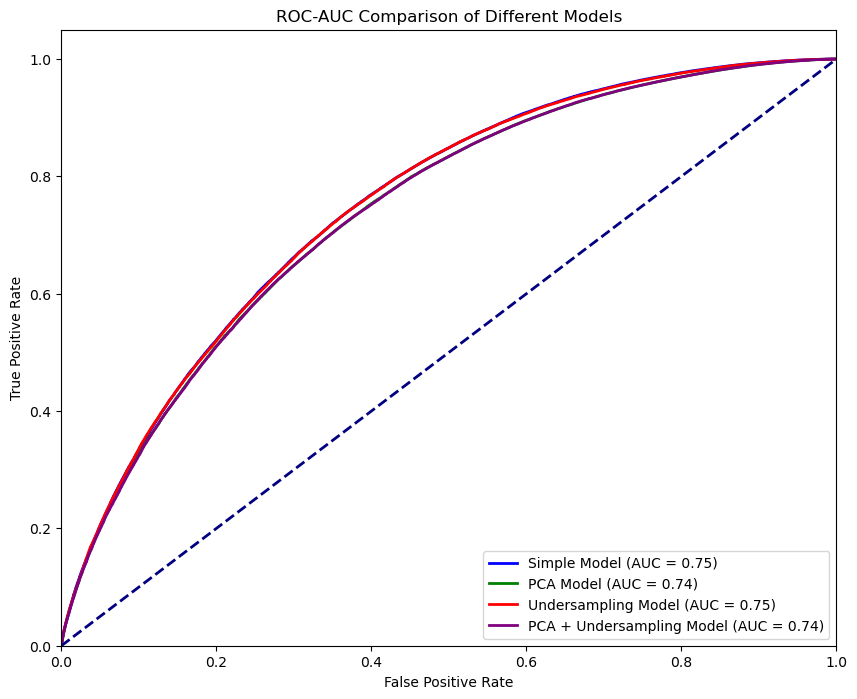

In [57]:
# ROC-AUC Curves Comparison
fpr_simple, tpr_simple, _ = roc_curve(y_test, simple_model_pred_proba)
roc_auc_simple = roc_auc_score(y_test, simple_model_pred_proba)

fpr_pca, tpr_pca, _ = roc_curve(y_test, pca_model_pred_proba)
roc_auc_pca = roc_auc_score(y_test, pca_model_pred_proba)

fpr_undersample, tpr_undersample, _ = roc_curve(y_test, undersample_model_pred_proba)
roc_auc_undersample = roc_auc_score(y_test, undersample_model_pred_proba)

fpr_pca_undersample, tpr_pca_undersample, _ = roc_curve(y_test, pca_undersample_model_pred_proba)
roc_auc_pca_undersample = roc_auc_score(y_test, pca_undersample_model_pred_proba)

plt.figure(figsize=(10, 8))
plt.plot(fpr_simple, tpr_simple, color='blue', lw=2, label='Simple Model (AUC = %0.2f)' % roc_auc_simple)
plt.plot(fpr_pca, tpr_pca, color='green', lw=2, label='PCA Model (AUC = %0.2f)' % roc_auc_pca)
plt.plot(fpr_undersample, tpr_undersample, color='red', lw=2, label='Undersampling Model (AUC = %0.2f)' % roc_auc_undersample)
plt.plot(fpr_pca_undersample, tpr_pca_undersample, color='purple', lw=2, label='PCA + Undersampling Model (AUC = %0.2f)' % roc_auc_pca_undersample)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Comparison of Different Models')
plt.legend(loc="lower right")
plt.savefig('roc_auc_comparison.png')  # Save the ROC-AUC comparison plot
plt.show()

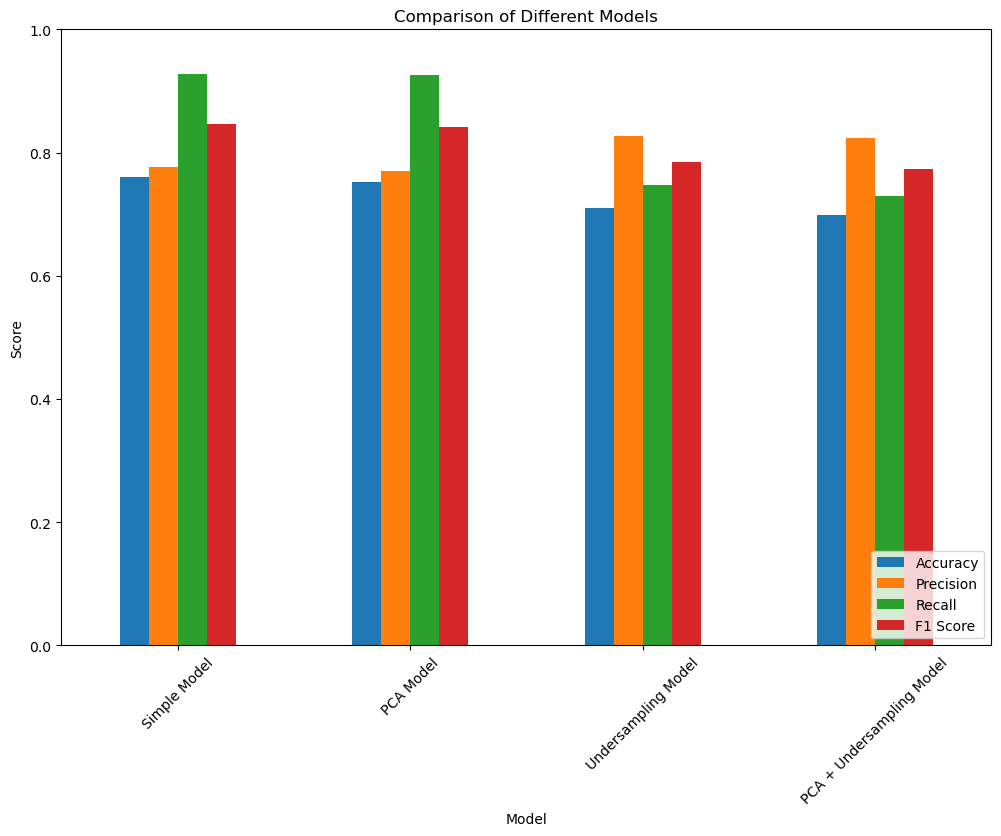

In [55]:
# Metrics Comparison
metrics = {
    'Model': ['Simple Model', 'PCA Model', 'Undersampling Model', 'PCA + Undersampling Model'],
    'Accuracy': [
        accuracy_score(y_test, simple_model_pred),
        accuracy_score(y_test, pca_model_pred),
        accuracy_score(y_test, undersample_model_pred),
        accuracy_score(y_test, pca_undersample_model_pred)
    ],
    'Precision': [
        precision_score(y_test, simple_model_pred),
        precision_score(y_test, pca_model_pred),
        precision_score(y_test, undersample_model_pred),
        precision_score(y_test, pca_undersample_model_pred)
    ],
    'Recall': [
        recall_score(y_test, simple_model_pred),
        recall_score(y_test, pca_model_pred),
        recall_score(y_test, undersample_model_pred),
        recall_score(y_test, pca_undersample_model_pred)
    ],
    'F1 Score': [
        f1_score(y_test, simple_model_pred),
        f1_score(y_test, pca_model_pred),
        f1_score(y_test, undersample_model_pred),
        f1_score(y_test, pca_undersample_model_pred)
    ]
}

metrics_df = pd.DataFrame(metrics)
metrics_df.set_index('Model').plot(kind='bar', figsize=(12, 8))
plt.title('Comparison of Different Models')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.xticks(rotation=45)
plt.savefig('metrics_comparison.png')  # Save the metrics comparison plot
plt.show()
